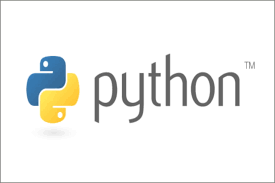

In [55]:
import sympy as sp
import numpy as np

x = sp.Symbol('x') # Nombre de téléphones de bureau 
y = sp.Symbol('y') # Nombre de téléphones mobile

# les coefficients de Kuhn-Tucker :
a = sp.Symbol('a')
b = sp.Symbol('b')

# Lagrangien :
L = 12*x + 20*y - a*(0.2*x+0.4*y-400) - b*(0.5*x+0.4*y-490)

# Dérivées partielles :

dL_dx = sp.diff(L,x)
dL_dy = sp.diff(L,y)
dL_da = sp.diff(L,a)
dL_db = sp.diff(L,b)
print("dérivée partielle du Lagrangien selon x, et condition de Kuhn-Tucker :",dL_dx,"<= 0")
print("dérivée partielle du Lagrangien selon y, et condition de Kuhn-Tucker :",dL_dy,"<= 0")
print("dérivée partielle du Lagrangien selon a, et condition de Kuhn-Tucker :",dL_da,"= 0")
print("dérivée partielle du Lagrangien selon b, et condition de Kuhn-Tucker :",dL_db,"= 0")


dérivée partielle du Lagrangien selon x, et condition de Kuhn-Tucker : -0.2*a - 0.5*b + 12 <= 0
dérivée partielle du Lagrangien selon y, et condition de Kuhn-Tucker : -0.4*a - 0.4*b + 20 <= 0
dérivée partielle du Lagrangien selon a, et condition de Kuhn-Tucker : -0.2*x - 0.4*y + 400 = 0
dérivée partielle du Lagrangien selon b, et condition de Kuhn-Tucker : -0.5*x - 0.4*y + 490 = 0


In [57]:
"""
Nous supposons (sans démonstration) que la fonction objectif est concave et les contraintes sont convexes, donc
les conditions de Kuhn-Tucker sont des conditions nécessaires et suffisantes d’optimalité

"""

from scipy.optimize import fsolve
def syst(var): # définition du système
    x, y, a, b = var[0], var[1], var[2], var[3] # définition des variables
    
    #relations d’exclusion :
    
    eq1 = (12-0.2*a-0.5*b)
    eq2 = (20-0.4*a-0.4*b)
    eq3 = (400-0.2*x-0.4*y)
    eq4 = (490-0.5*x-0.4*y)
    res = [eq1, eq2, eq3, eq4]
    return res

x0, y0, a0, b0 = 0, 0, 0, 0 
sol_ini = [x0, y0, a0, b0]

resultat=np.array(fsolve(syst, sol_ini))

print('on peut produire {} téléphones fixes et {} téléphones mobiles'.format(round(resultat[0]),round(resultat[1])))

on peut produire 300.0 téléphones fixes et 850.0 téléphones mobiles
